## Project Overview
- Your goal for this project is to fetch all securties in each index that propose a gain today. 
- Not only will you fetch these you will sort the returns as wells a find the securites that are of penny value (we wil lconsider all stocks under 5 dollars a penny stock
- In the current status of economy and Covid 19 one may wonder what a perfect portfolio would look like. Find and optimize a poortfolio that would have generated a satisfying return during the Covid 19 pandemic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_datareader import data as web

### Nasdaq
- Importing tickers for the Nasdaq
- 103 companies listed

In [3]:
nasdaq = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [5]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
Ticker               103 non-null object
Name                 103 non-null object
Price                103 non-null float64
Dividend Yield       56 non-null float64
Market Cap ($M)      102 non-null float64
Forward P/E Ratio    102 non-null float64
Payout Ratio         56 non-null float64
Beta                 102 non-null float64
dtypes: float64(6), object(2)
memory usage: 6.6+ KB


### Visualizations
 - There is one company with a dividend yield above 5% and a few 4% and above 
 - lets find these companies

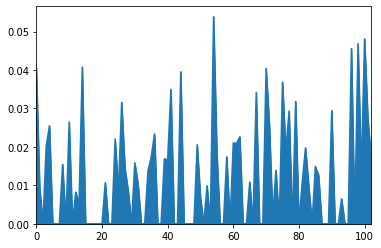

In [16]:
nasdaq["Dividend Yield"].plot(kind = "area")

In [26]:
nasdaq.set_index("Ticker")[["Dividend Yield", "Name"]].sort_values("Dividend Yield",ascending = False).head(10)

,Dividend Yield,Name
Ticker,,
KHC,0.053854,The Kraft Heinz Co.
WYNN,0.048106,Wynn Resorts Ltd.
WDC,0.046849,Western Digital Corp.
WBA,0.045597,"Walgreens Boots Alliance, Inc."
AVGO,0.040757,"Broadcom, Inc."
NTAP,0.040466,"NetApp, Inc."
AAL,0.040445,"American Airlines Group, Inc."
HAS,0.039535,"Hasbro, Inc."
PAYX,0.036795,"Paychex, Inc."


### Below are the top 10 Dividend  Yielding companies in the Nasdaq

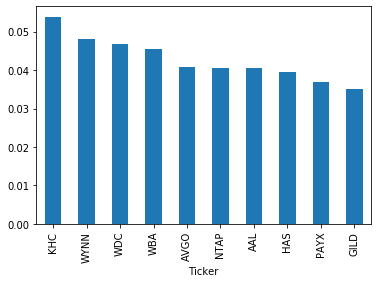

In [31]:
nasdaq.set_index("Ticker")["Dividend Yield"].sort_values(ascending = False).head(10).plot(kind = "bar")

### Fetch Adjustable close for all securities in the nasdaq
- Will fetch this form the yahoo finance library 

In [35]:
nasd_tickers = list(nasdaq["Ticker"])

In [37]:
nasdaq_adj_Close = pd.DataFrame()

In [40]:
passed = []
failed = []
for x in nasd_tickers:
    try:
        nasdaq_adj_Close[x] = web.DataReader(x, data_source="yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except(IOError, KeyError):
        failed.append(x)

### Checking for missing Data
- Will drop if Null,but appear there is no data missing below

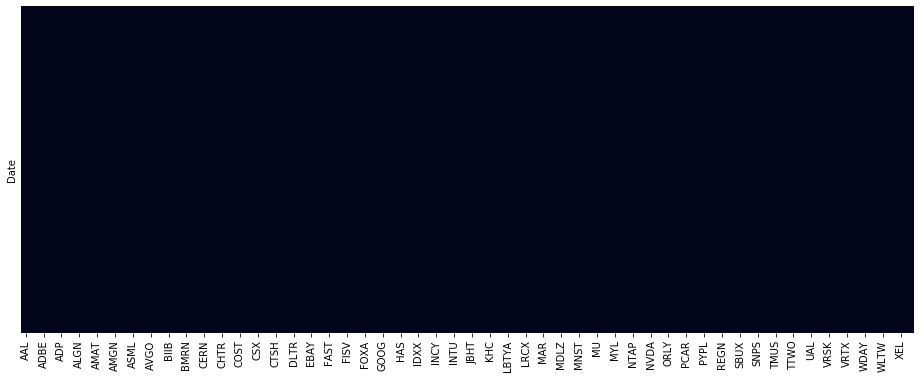

In [50]:
plt.figure(figsize=(16,6))
sns.heatmap(nasdaq_adj_Close.isnull(), yticklabels=False, cbar=False)

## Checking Coorelation 

In [53]:
nasdaq_adj_Close.corr()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMD,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
AAL,1.000000,-0.146983,-0.227087,0.318638,0.886784,-0.027458,0.290261,0.138353,0.412580,-0.252074,...,0.002838,0.128445,-0.543753,0.882861,0.328629,0.921893,0.420083,0.921966,0.271281,0.049515
AAPL,-0.146983,1.000000,0.949649,0.654956,-0.041643,0.871626,0.790852,0.453286,0.717270,0.906267,...,0.906838,0.473533,0.581317,-0.406246,0.772326,-0.265800,0.523162,-0.026648,0.626249,0.820789
ADBE,-0.227087,0.949649,1.000000,0.714142,-0.050930,0.939266,0.772696,0.549442,0.706112,0.812012,...,0.894561,0.511654,0.735421,-0.492639,0.800095,-0.300214,0.529117,-0.102873,0.553765,0.792788
ADI,0.318638,0.654956,0.714142,1.000000,0.531895,0.861739,0.880379,0.820322,0.894530,0.452513,...,0.766902,0.731592,0.516571,0.066157,0.860815,0.309142,0.774318,0.492255,0.569433,0.784178
ADP,0.886784,-0.041643,-0.050930,0.531895,1.000000,0.170284,0.436996,0.390505,0.573710,-0.199283,...,0.198551,0.424151,-0.223369,0.742650,0.488032,0.925760,0.634700,0.913785,0.417174,0.182118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDC,0.921893,-0.265800,-0.300214,0.309142,0.925760,-0.087291,0.238974,0.201346,0.388369,-0.352622,...,-0.035096,0.252811,-0.440872,0.844729,0.279679,1.000000,0.492235,0.917353,0.211508,0.016070
WLTW,0.420083,0.523162,0.529117,0.774318,0.634700,0.654789,0.800232,0.591971,0.856222,0.387455,...,0.726808,0.737247,0.369341,0.173341,0.799031,0.492235,1.000000,0.582014,0.638914,0.632653
WYNN,0.921966,-0.026648,-0.102873,0.492255,0.913785,0.098387,0.431697,0.352919,0.535282,-0.133017,...,0.132871,0.385180,-0.348375,0.790285,0.451941,0.917353,0.582014,1.000000,0.302327,0.211860
XEL,0.271281,0.626249,0.553765,0.569433,0.417174,0.604219,0.659820,0.317095,0.745153,0.616612,...,0.785532,0.475375,0.217185,0.077145,0.632739,0.211508,0.638914,0.302327,1.000000,0.571480


## Checking returns for each Security 
- we will look the most recent date(Todays Data) 

In [78]:
todays_date = nasdaq_adj_Close.iloc[-1:].iloc[0].name

In [86]:
nasdaq_adj_Close.pct_change().iloc[-1:].transpose().sort_values(todays_date, ascending = False).head(10)

Date,2020-09-02
LRCX,0.055761
ILMN,0.047924
AMAT,0.046049
MU,0.042391
NVDA,0.040270
WDC,0.037225
CERN,0.034221
SWKS,0.034139
AVGO,0.032820
WLTW,0.032250


Text(0, 0.5, 'Returns')

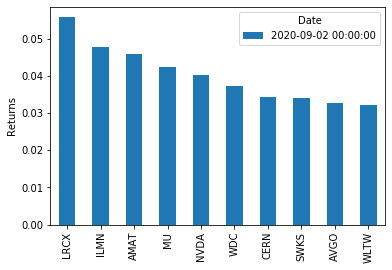

In [87]:
nasdaq_adj_Close.pct_change().iloc[-1:].transpose().sort_values(todays_date, ascending = False).head(10).plot(kind = "bar")
plt.ylabel("Returns")

## Nasdaq Volatility 
- Lets look at the volatility of each security year to date

In [93]:
nas_returns = nasdaq_adj_Close.pct_change()

In [94]:
nas_returns

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMD,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.049502,-0.009722,-0.007834,-0.017604,-0.002114,-0.015333,-0.011421,-0.013260,-0.015916,-0.010183,...,0.009727,0.021095,-0.006699,0.000000,0.005852,-0.015392,0.000245,-0.014833,0.004809,-0.023020
2020-01-06,-0.011935,0.007968,0.005726,-0.011749,0.001353,0.011733,0.019398,0.001598,-0.021565,-0.004321,...,0.002294,0.009259,0.027755,0.008632,0.006234,-0.019192,0.001223,-0.001979,-0.001436,-0.020844
2020-01-07,-0.003660,-0.004703,-0.000959,0.022751,-0.012104,0.002031,-0.009864,0.002533,0.028886,-0.002893,...,0.008369,0.002318,-0.001071,-0.005034,0.020414,0.067698,-0.002053,0.004745,-0.002077,0.022830
2020-01-08,0.022777,0.016086,0.013438,0.009032,0.009397,0.013067,0.010386,0.016191,-0.000649,-0.008705,...,0.009207,0.004626,0.032620,-0.058357,0.033304,0.014484,0.001127,0.006274,-0.000961,-0.002815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,0.038311,-0.011954,-0.034381,-0.007090,0.010028,-0.020547,0.016428,0.017354,-0.027133,-0.025808,...,0.001073,-0.003069,0.011243,0.017326,0.014090,0.027405,0.019795,0.020283,0.007339,-0.012002
2020-08-28,0.023343,-0.001620,0.011992,0.004536,0.002340,0.017605,-0.016556,0.008293,0.016766,0.020883,...,0.003966,0.001299,-0.015966,-0.014743,0.125791,0.073780,0.000487,0.058137,0.000291,0.011473
2020-08-31,-0.039735,0.033912,-0.005906,-0.022579,-0.015919,-0.006831,-0.011977,0.067576,-0.023307,0.061601,...,-0.003630,0.031998,0.033931,-0.019092,-0.017099,0.015328,-0.000632,-0.044784,0.011945,-0.007149


In [106]:
nasdaq_vol = []
for x in nas_returns.columns:
    nasdaq_vol.append(nas_returns[f"{x}"].std() * 252)

In [107]:
nasdaq_vol_df = pd.DataFrame(nasdaq_vol, columns=["volatility"], index=nas_returns.columns)

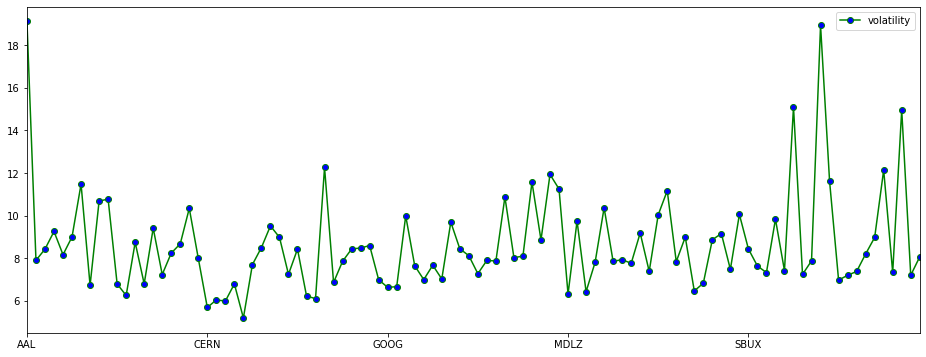

In [113]:
nasdaq_vol_df.plot(figsize = (16,6), c ="g", marker = "o", mfc = "b")

## Sorting Volatility for Nasdaq
- top 10 mose volatile companies in the nasdaq year to date

In [127]:
nasdaq_vol_df.sort_values("volatility", ascending = False).head(10)

,volatility
AAL,19.114978
UAL,18.935879
TSLA,15.103574
WYNN,14.962236
EXPE,12.261732
WDC,12.137832
MAR,11.932495
ULTA,11.618707
LRCX,11.570678
ALGN,11.478777


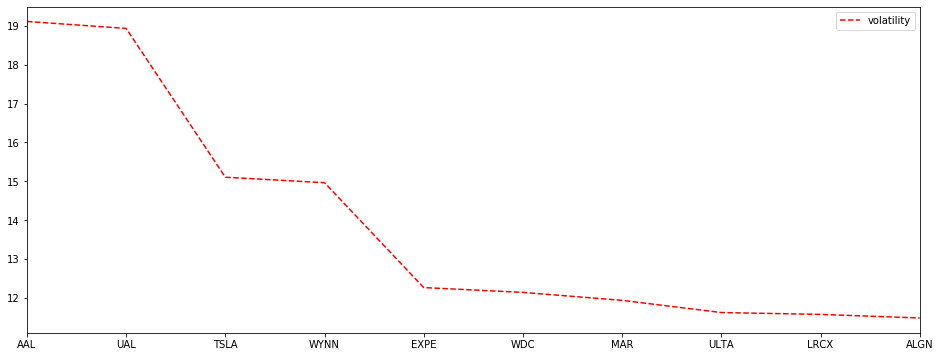

In [126]:
nasdaq_vol_df.sort_values("volatility", ascending = False).head(10).plot(figsize = (16,6), 
                                                                          kind = "line", ls = "--", c= "r" )

### Creating an Optimized Portfolio for Nasdaq
- We are considering Covid 19 and the portfolio that would have yielded the highest return considering risk. 
- THe optimized portfolio should consist of 10 companies
- Creating an efficient frontier using every company in the nasdaq
- This will proivde us with the top weighted companies year today where we will than take the top 10 weighted companies
- Will create 1000 portfolios to get the portfolio containing every company

In [131]:
n_portfolios = 1000
all_weights = np.zeros((n_portfolios, len(passed)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(passed)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(nas_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(nas_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

### Evaluating the portfolio
- Max sharp
- Max returns
- min vol
- again we are fetching the max return(focus) for a portfolio containing 10 companies in 2020

In [135]:
max_sharp = all_Sharps.argmax()

In [136]:
max_returns = all_returns.argmax()

In [137]:
lowest_vol = all_vol.argmin()

### Plot on a scatter plot for visualization
- As you can see the maximum returns for a portfolio containing every company in the Nasdaq would yield avolatility of approzimately 40% and this is non the less not fesiable and unrealistic
- Below we will find the to companies that make up the portfolio relative to weight that produces the max Return

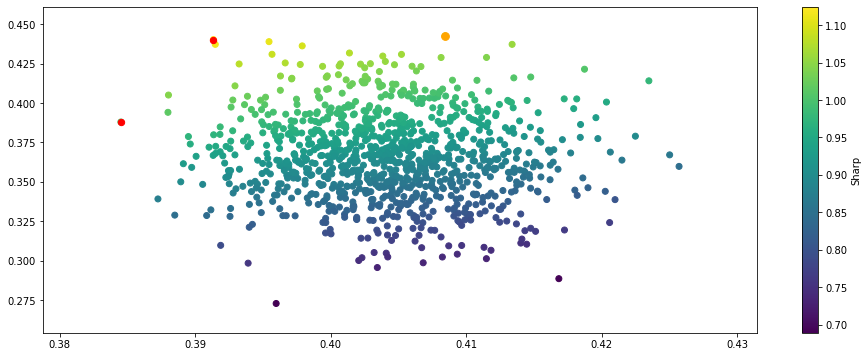

In [146]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c="red", s = 40)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol], c="red", s = 40)
plt.scatter(all_vol[max_returns], all_returns[max_returns], c="orange", s = 60)

## Creating Frontier Data frame from created portfolio
- Will use this to get the max return portfolio by weight 
- Will than sort the weights of the max return portfolio to grab the to 10 compaines

In [147]:
frontier_returns = pd.DataFrame(all_returns, columns=["returns"])

In [152]:
frontier_weights = pd.DataFrame(all_weights, columns=passed)

In [154]:
frontier_vol = pd.DataFrame(all_vol, columns=["Vol"])

In [156]:
frontier_sharp = pd.DataFrame(all_Sharps, columns=["Sharp"])

In [158]:
frontier = pd.concat([frontier_returns, frontier_sharp, frontier_vol, frontier_weights], axis=1)

In [159]:
frontier

,returns,Sharp,Vol,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
0,0.356867,0.871877,0.409309,0.019259,0.014261,0.007510,0.007103,0.007091,0.015469,0.012812,...,0.006743,0.011417,0.015228,0.000765,0.004514,0.014335,0.003261,0.001619,0.016976,0.010149
1,0.415108,1.030769,0.402717,0.002724,0.014629,0.005966,0.002935,0.010474,0.008322,0.003142,...,0.002038,0.012895,0.007859,0.008291,0.000751,0.016047,0.004699,0.010958,0.011695,0.018990
2,0.369901,0.923592,0.400503,0.002888,0.012997,0.012444,0.014429,0.014895,0.017856,0.012485,...,0.003616,0.014686,0.006613,0.011554,0.001904,0.016301,0.003633,0.013970,0.002616,0.013949
3,0.413832,1.028653,0.402305,0.000558,0.003159,0.002187,0.000858,0.010981,0.020295,0.004452,...,0.006175,0.019100,0.006800,0.018293,0.015724,0.005291,0.001236,0.018626,0.002369,0.005672
4,0.339675,0.829341,0.409573,0.008941,0.002102,0.011624,0.011643,0.007073,0.007131,0.013059,...,0.002563,0.010287,0.013842,0.004642,0.013218,0.007651,0.006298,0.018637,0.016463,0.014081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.375418,0.923926,0.406329,0.004010,0.011575,0.020068,0.006132,0.018078,0.011992,0.006669,...,0.018607,0.011281,0.008802,0.010298,0.017405,0.008898,0.013809,0.011285,0.004714,0.013529
996,0.368787,0.886122,0.416180,0.017572,0.010383,0.000285,0.016766,0.009173,0.011846,0.017703,...,0.009715,0.006624,0.005008,0.012656,0.019003,0.011519,0.000357,0.009492,0.001231,0.014763
997,0.363468,0.898769,0.404406,0.005617,0.009087,0.005106,0.013247,0.010644,0.015086,0.011246,...,0.002341,0.018439,0.012652,0.006382,0.009193,0.000183,0.001237,0.009395,0.000595,0.005997
998,0.393804,0.948248,0.415296,0.010416,0.000009,0.019557,0.018570,0.004613,0.003476,0.012653,...,0.007265,0.002975,0.012371,0.018769,0.004518,0.016690,0.010288,0.017242,0.019901,0.020453


### Finding max return portfolio
- Maximum return for the portfolio containing every company in the Nasdaq is 44%
- We wil ltake the top 10 companies in the portfolio

In [167]:
frontier[frontier["returns"] == frontier["returns"].max()]

,returns,Sharp,Vol,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
289,0.442502,1.083435,0.408425,0.003085,0.018003,0.018311,0.015971,0.003242,0.002851,0.017549,...,0.018322,0.000394,0.007179,0.001907,0.009513,0.000852,0.010555,0.009406,0.002533,0.017253


## Top 10 companies in portfolio
- we will make a portfolio out of these companies to see what is the maximum return we could have received

In [175]:
frontier[frontier["returns"] == frontier["returns"].max()].transpose().drop(["returns"
                                                    ,"Sharp", "Vol"]).sort_values(289, ascending = False).head(10)

,289
LRCX,0.019438
QCOM,0.019380
KLAC,0.019280
CHTR,0.018988
AVGO,0.018932
CSCO,0.018825
FAST,0.018341
NVDA,0.018337
VRSK,0.018322
ADBE,0.018311


In [198]:
top10 = frontier[frontier["returns"] == frontier["returns"].max()].transpose().drop(["returns"
                                                    ,"Sharp", "Vol"]).sort_values(289, ascending = False).head(10)

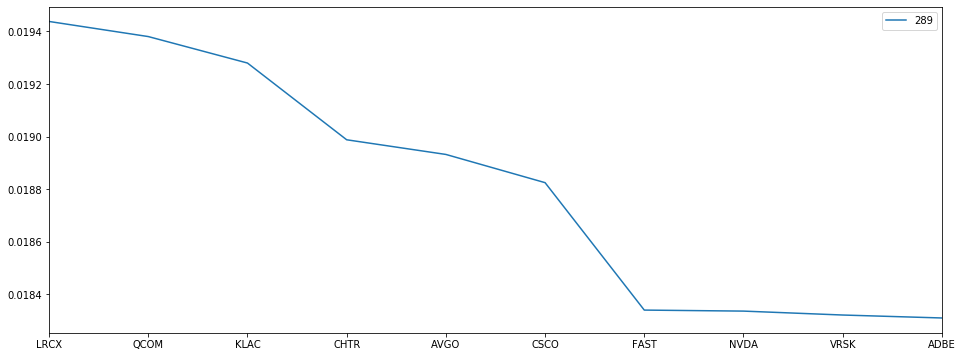

In [199]:
top10.plot(figsize = (16,6))

In [200]:
top10_tickers = list(top10.index)

In [201]:
top_10_returns = nas_returns[top10_tickers]

In [202]:
top_10_returns

,LRCX,QCOM,KLAC,CHTR,AVGO,CSCO,FAST,NVDA,VRSK,ADBE
Date,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.010742,-0.018830,-0.019116,0.008238,-0.025435,-0.016316,-0.017728,-0.016006,0.009727,-0.007834
2020-01-06,-0.018664,-0.005861,-0.022504,0.006027,-0.001496,0.003569,-0.015587,0.004194,0.002294,0.005726
2020-01-07,0.024378,0.028436,0.007941,0.003438,-0.003443,-0.006485,-0.001944,0.012107,0.008369,-0.000959
2020-01-08,0.012591,-0.002922,0.001303,0.003225,-0.012474,0.000632,0.007515,0.001876,0.009207,0.013438
...,...,...,...,...,...,...,...,...,...,...
2020-08-27,-0.029420,-0.000172,-0.036658,-0.000439,-0.001560,0.000947,0.005406,-0.011333,0.001073,-0.034381
2020-08-28,0.027325,0.018790,0.020347,0.002198,0.016748,-0.002128,0.010134,0.041138,0.003966,0.011992
2020-08-31,-0.041165,0.007614,-0.016634,-0.000049,0.006757,0.000474,0.000410,0.017246,-0.003630,-0.005906


In [215]:
n_port = 2000
all_w = np.zeros((n_port, len(top10_tickers)))
all_s = np.zeros(n_port)
all_v = np.zeros(n_port)
all_r = np.zeros(n_port)

for index in range(n_port):
    weii = np.array(np.random.random(len(top10_tickers)))
    weii = weii/weii.sum()
    all_w[index,:] = weii
    
    all_r[index] = np.sum(top_10_returns.mean() * weii * 252)
    all_v[index] = np.sqrt(np.dot(weii.T, np.dot(top_10_returns.cov() * 252, weii)))
    all_s[index] = all_r[index]/all_v[index]

### Analysis of portfolio
- Max Ret
- Max Sharp 
- Lowest Vol 
- Targeting Highest Return

In [216]:
max_ret = all_r.argmax()

In [217]:
max_shp = all_s.argmax()

In [218]:
lowest_v = all_v.argmin()

Text(0.5, 1.0, 'Nasdaq Portfolio Optimized for Maximum Return- \n 10 compaines by weight')

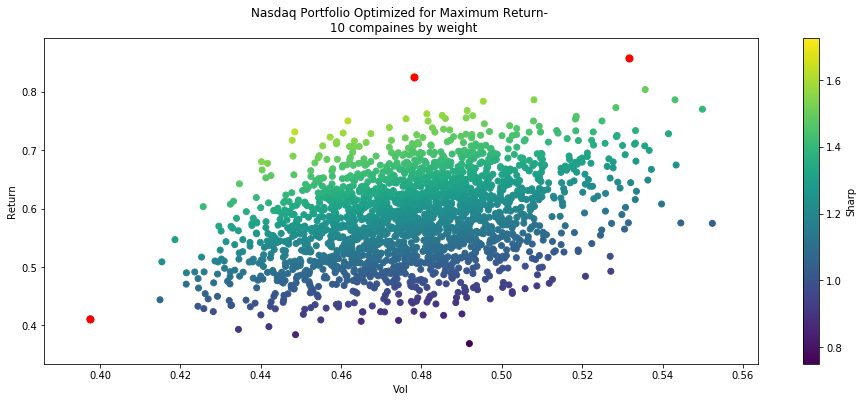

In [230]:
plt.figure(figsize=(16,6))
plt.scatter(all_v, all_r, c = all_s)
plt.colorbar(label = "Sharp")
plt.scatter(all_v[max_ret], all_r[max_ret], c = "r", s = 50)
plt.scatter(all_v[lowest_v], all_r[lowest_v], c = "r", s = 50)
plt.scatter(all_v[max_shp], all_r[max_shp], c = "r", s = 50)
plt.ylabel("Return")
plt.xlabel("Vol")
plt.title("Nasdaq Portfolio Optimized for Maximum Return- \n 10 compaines by weight")

In [233]:
top_weights = pd.DataFrame(all_w, columns=top10_tickers)   

In [234]:
top_retruns = pd.DataFrame(all_r, columns=["returns"])

In [235]:
top_vol = pd.DataFrame(all_v, columns=["vol"])

In [236]:
top_sharp= pd.DataFrame(all_s, columns=["shp"])

In [237]:
top_frontier = pd.concat([top_retruns,top_sharp, top_vol, top_weights], axis=1)

In [238]:
top_frontier

,returns,shp,vol,LRCX,QCOM,KLAC,CHTR,AVGO,CSCO,FAST,NVDA,VRSK,ADBE
0,0.619561,1.255900,0.493320,0.137561,0.010232,0.137217,0.143083,0.113007,0.086468,0.053841,0.155886,0.094888,0.067819
1,0.557460,1.109116,0.502616,0.145824,0.141781,0.166087,0.145265,0.161819,0.014480,0.058419,0.027611,0.053545,0.085170
2,0.648650,1.209403,0.536339,0.212366,0.098116,0.136951,0.022598,0.149445,0.034041,0.066695,0.119468,0.064901,0.095419
3,0.631794,1.239161,0.509857,0.109477,0.191818,0.066806,0.090257,0.219531,0.065276,0.003979,0.108692,0.017010,0.127153
4,0.558011,1.129593,0.493993,0.174071,0.148030,0.080977,0.067443,0.075947,0.122964,0.068032,0.082354,0.118366,0.061817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.623098,1.237175,0.503645,0.141638,0.078312,0.119018,0.010726,0.156537,0.028407,0.155565,0.115352,0.154251,0.040194
1996,0.411151,1.034241,0.397539,0.017274,0.005607,0.032564,0.268432,0.028332,0.213223,0.261914,0.041075,0.129667,0.001912
1997,0.580829,1.220372,0.475944,0.124505,0.050685,0.101019,0.110647,0.023545,0.148306,0.001926,0.115706,0.173839,0.149822
1998,0.520879,1.047541,0.497239,0.122416,0.034422,0.152652,0.024070,0.107137,0.182619,0.055687,0.090676,0.129644,0.100677


## Max return Portfolio by weight

In [239]:
top_frontier[top_frontier["returns"] == all_r.max()]

,returns,shp,vol,LRCX,QCOM,KLAC,CHTR,AVGO,CSCO,FAST,NVDA,VRSK,ADBE
1800,0.85784,1.61361,0.531628,0.191998,0.040827,0.074108,0.108569,0.072115,0.025891,0.075176,0.338226,0.003844,0.069248


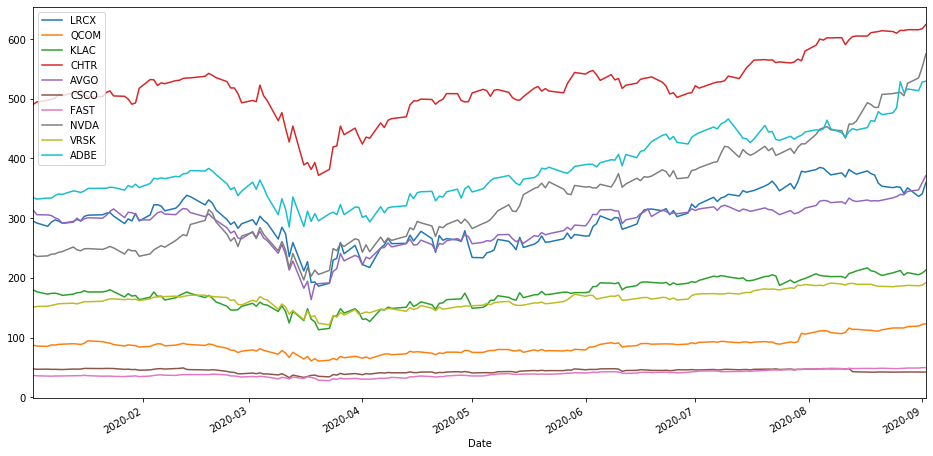

In [248]:
nasdaq_adj_Close[top10_tickers].plot(figsize = (16,8))

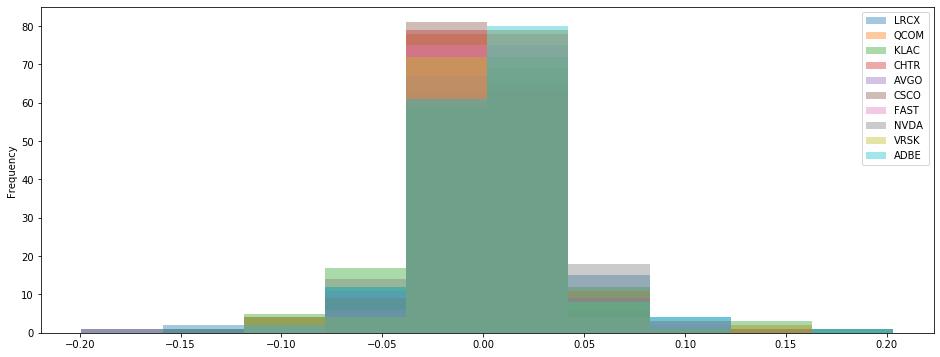

In [259]:
nas_returns[top10_tickers].plot(figsize =(16,6), kind = "hist",alpha = 0.4)